In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, GRU, Embedding,LSTM
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.backend import square, mean
from tensorflow.keras.utils import plot_model

In [0]:
from scipy import stats

In [4]:
df = pd.read_csv('/content/sample_data/climate_data2.csv',sep = ';',infer_datetime_format=True,header = 0, parse_dates=['# Date'])
#dataset.head()
df['# Date'] = pd.to_datetime(df['# Date'])
df = df.set_index("# Date")
type(df.index)
df.head()

,UT time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
# Date,,,,,,,,,,
1980-01-01,24:00,284.55,76.59,968.48,3.61,113.37,5.203010,0.4192,0.000396,2157.781
1980-01-02,24:00,284.81,56.53,971.38,1.07,62.33,0.140569,0.0000,0.000535,3758.814
1980-01-03,24:00,284.46,44.87,973.32,0.93,344.69,0.000000,0.0000,0.000280,4024.862
1980-01-04,24:00,285.08,37.16,974.53,0.26,317.64,0.000000,0.0000,0.000155,4109.105
1980-01-05,24:00,283.85,38.61,974.07,1.70,295.94,0.000000,0.0000,0.000071,4146.958


In [5]:
df = df.drop('UT time',axis = 1)
df.head()

,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
# Date,,,,,,,,,
1980-01-01,284.55,76.59,968.48,3.61,113.37,5.203010,0.4192,0.000396,2157.781
1980-01-02,284.81,56.53,971.38,1.07,62.33,0.140569,0.0000,0.000535,3758.814
1980-01-03,284.46,44.87,973.32,0.93,344.69,0.000000,0.0000,0.000280,4024.862
1980-01-04,285.08,37.16,974.53,0.26,317.64,0.000000,0.0000,0.000155,4109.105
1980-01-05,283.85,38.61,974.07,1.70,295.94,0.000000,0.0000,0.000071,4146.958


In [0]:
df = df[['Rainfall','Temperature','Relative Humidity','Pressure','Wind speed','Wind direction','Short-wave irradiation']]

In [7]:
z = np.abs(stats.zscore(df))
print(z)
z.max()

[[0.5262923  1.72391599 1.5743976  ... 1.16772797 1.24289973 2.11206065]
 [0.20048662 1.68871899 0.61026602 ... 0.79537119 1.76877937 1.12750159]
 [0.22066712 1.73609956 0.04985853 ... 0.90357351 1.14045605 0.96389473]
 ...
 [0.22058831 0.51774204 0.40407836 ... 1.90968671 0.78705339 0.90012003]
 [0.22066712 0.61114945 0.45454387 ... 0.75810492 0.71946385 0.237695  ]
 [0.17793231 0.34175707 0.46367572 ... 0.63444513 0.9894099  0.26548347]]


38.24327819750121

In [8]:
threshold = 3
print(np.where(z > 3))

(array([   54,    55,   114,   194,   195,   209,   211,   214,   218,
         249,   444,   464,   465,   529,   559,   560,   562,   563,
         565,   566,   574,   575,   672,   789,   790,   813,   860,
         862,   947,  1092,  1122,  1200,  1200,  1201,  1303,  1303,
        1304,  1304,  1339,  1362,  1509,  1510,  1521,  1528,  1582,
        1583,  1603,  1604,  1681,  1706,  1707,  1882,  1883,  2037,
        2042,  2043,  2044,  2108,  2232,  2276,  2296,  2652,  2677,
        2678,  2979,  2992,  2992,  3002,  3068,  3115,  3124,  3134,
        3135,  3142,  3153,  3158,  3187,  3188,  3189,  3294,  3383,
        3384,  3388,  3415,  3416,  3482,  3483,  3497,  3498,  3526,
        3527,  3751,  3766,  3829,  3837,  3902,  4015,  4015,  4124,
        4137,  4143,  4150,  4160,  4375,  4458,  4509,  4510,  4589,
        4613,  4636,  4792,  4804,  4824,  4830,  4854,  4855,  4939,
        4939,  4940,  4946,  4950,  4951,  4997,  5124,  5125,  5164,
        5189,  5190

In [0]:
rows,columns = np.where(z>3)

In [0]:
for row,column in zip(rows,columns):
  if column == 0:
    df.iloc[row,column] = 0.931113
  if column == 4:
    df.iloc[row,column] = 2.057803

In [11]:
df.shape

(14701, 7)

In [0]:
dataset = df.copy()

In [13]:
dataset = dataset[['Rainfall','Temperature','Relative Humidity','Pressure','Wind speed','Wind direction','Short-wave irradiation']]
dataset.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation
# Date,,,,,,,
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958


In [0]:
df['Various', 'Day'] = df.index.dayofyear
df['Various', 'Hour'] = df.index.hour

In [14]:
df.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation
# Date,,,,,,,
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958


In [0]:
df = df[['Rainfall','Temperature','Relative Humidity','Pressure','Wind speed','Wind direction','Short-wave irradiation',('Various','Day'),('Various','Day')]]

In [20]:
df.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation,"(Various, Day)","(Various, Day)"
# Date,,,,,,,,,
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781,1,1
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814,2,2
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862,3,3
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105,4,4
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958,5,5


In [14]:
max(df.Rainfall)

22.299929000000002

In [0]:
target_names = ['Rainfall']

In [0]:
shift_steps = 1
df_targets = df[target_names].shift(-shift_steps)

In [17]:

df[target_names].head(shift_steps + 5)

,Rainfall
# Date,
1980-01-01,5.203010
1980-01-02,0.140569
1980-01-03,0.000000
1980-01-04,0.000000
1980-01-05,0.000000
1980-01-06,0.000000


In [18]:
df_targets.head(5)

,Rainfall
# Date,
1980-01-01,0.140569
1980-01-02,0.000000
1980-01-03,0.000000
1980-01-04,0.000000
1980-01-05,0.000000


In [19]:
df_targets.tail()

,Rainfall
# Date,
2020-03-27,0.179407
2020-03-28,0.000549
2020-03-29,0.000000
2020-03-30,0.297673
2020-03-31,NaN


In [0]:
x_data = df.values[0:-shift_steps]

In [21]:

print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (14700, 7)


In [0]:
y_data = df_targets.values[:-shift_steps]

In [23]:

print(type(y_data))

print("Shape:", y_data.shape)


<class 'numpy.ndarray'>
Shape: (14700, 1)


In [24]:
num_data = len(x_data)
num_data

14700

In [0]:
train_split = 0.9

In [69]:
num_train = 12537
num_train

12537

In [70]:
num_test = num_data - num_train
num_test

2163

In [28]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

14700

In [29]:

y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

14700

In [30]:
num_x_signals = x_data.shape[1]
num_x_signals

7

In [31]:

num_y_signals = y_data.shape[1]
num_y_signals

1

In [32]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: 0.0
Max: 8914.18


In [0]:
x_scaler = MinMaxScaler()

In [0]:


x_train_scaled = x_scaler.fit_transform(x_train)

In [35]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0000000000000002


In [0]:

x_test_scaled = x_scaler.transform(x_test)

In [0]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [38]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(12537, 7)
(12537, 1)


In [39]:
print(x_test_scaled.shape)
print(y_test_scaled.shape)

(2163, 7)
(2163, 1)


In [0]:

def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)


In [0]:
batch_size = 256

In [42]:
sequence_length = 120
sequence_length

120

In [0]:

generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [0]:
x_batch, y_batch = next(generator)

In [45]:
print(x_batch.shape)
print(y_batch.shape)

(256, 120, 7)
(256, 120, 1)


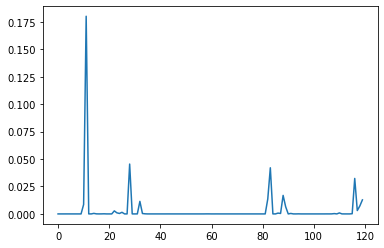

In [46]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)


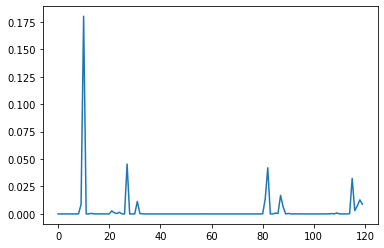

In [47]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [0]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [0]:
model = Sequential()
model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))
model.add(GRU(units=512
              ,return_sequences = True))
model.add(Dense(256,activation = 'relu'))

In [0]:

if True:
    from tensorflow.python.keras.initializers import RandomUniform

    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)

    model.add(Dense(num_y_signals,
                    activation='linear',
                    kernel_initializer=init))

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 512)         800256    
_________________________________________________________________
gru_1 (GRU)                  (None, None, 512)         1575936   
_________________________________________________________________
dense (Dense)                (None, None, 256)         131328    
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           257       
Total params: 2,507,777
Trainable params: 2,507,777
Non-trainable params: 0
_________________________________________________________________


In [0]:
warmup_steps = 15

In [0]:

def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculat the Mean Squared Error and use it as loss.
    mse = mean(square(y_true_slice - y_pred_slice))
    
    return mse

NameError: ignored

In [0]:
model.compile(loss= loss_mse_warmup, optimizer= 'adam',metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 512)         800256    
_________________________________________________________________
gru_1 (GRU)                  (None, None, 512)         1575936   
_________________________________________________________________
dense (Dense)                (None, None, 256)         131328    
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           257       
Total params: 2,507,777
Trainable params: 2,507,777
Non-trainable params: 0
_________________________________________________________________


In [0]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=10, verbose=1)


In [0]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [0]:
callbacks = [callback_early_stopping,
             callback_reduce_lr]


In [59]:
%%time
model.fit(x=generator,
          epochs=70,
          steps_per_epoch=45,
          validation_data=validation_data,
          callbacks=callbacks)

Epoch 1/70
45/45 [==============================] - 15s 328ms/step - loss: 0.0118 - root_mean_squared_error: 0.1087 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1008 - lr: 0.0010
Epoch 2/70
45/45 [==============================] - 14s 310ms/step - loss: 0.0099 - root_mean_squared_error: 0.0997 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0976 - lr: 0.0010
Epoch 3/70
45/45 [==============================] - 14s 313ms/step - loss: 0.0095 - root_mean_squared_error: 0.0975 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0964 - lr: 0.0010
Epoch 4/70
45/45 [==============================] - 14s 316ms/step - loss: 0.0093 - root_mean_squared_error: 0.0966 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0958 - lr: 0.0010
Epoch 5/70
45/45 [==============================] - ETA: 0s - loss: 0.0091 - root_mean_squared_error: 0.0957
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
45/45 [==============================] - 14s 314ms/step - loss: 0.

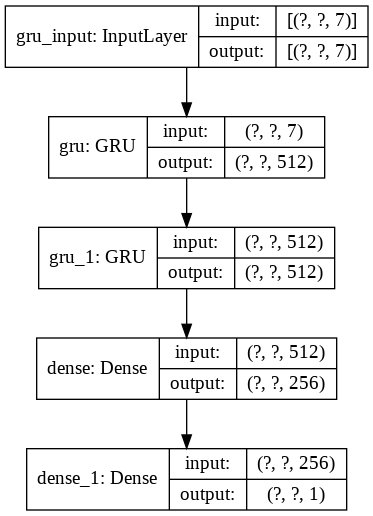

In [60]:
plot_model(model, show_shapes=True, to_file='stacked_gru.png')

In [61]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 2ms/step - loss: 0.0092 - root_mean_squared_error: 0.0956


In [62]:

print("loss (test-set):", result)

loss (test-set): [0.009184913709759712, 0.09559078514575958]


In [63]:

# If you have several metrics you can use this instead.
if True:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

loss: 9.185e-03
root_mean_squared_error: 9.559e-02


In [0]:
x = np.expand_dims(x_test_scaled, axis=0)
predictions = model.predict(x)

In [0]:
predictions

array([[[-0.00251794],
        [-0.00516127],
        [ 0.00148665],
        ...,
        [ 0.00041769],
        [ 0.00023567],
        [-0.00071293]]], dtype=float32)

In [65]:

# invert scaling for forecast

inv_yhat = y_scaler.inverse_transform(predictions[0])

# calculate RMSE
rmse = sqrt(mean_squared_error(y_test, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.141


In [0]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    indices = df.index.tolist()[start_idx:length +start_idx]
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(indices,signal_true, label='Actual rainfall')
        plt.plot(indices,signal_pred, label='prediction rainfall')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal]+'(in mm)')
        plt.xlabel('Days(24 hours)')
        plt.legend()
        plt.show()

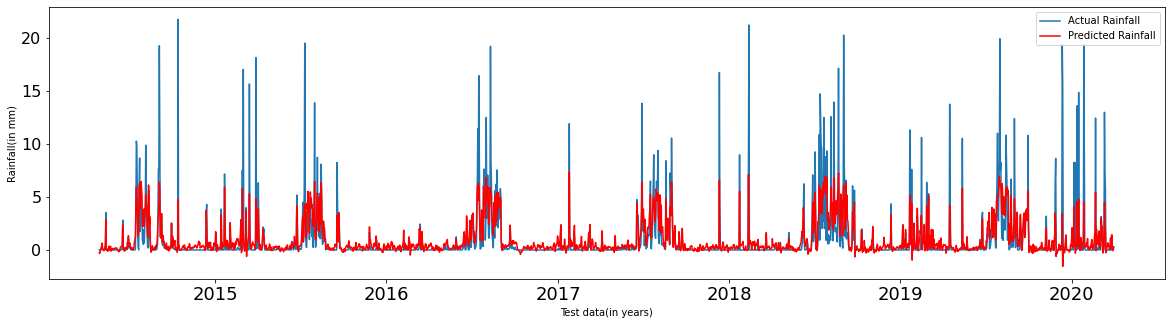

In [103]:
# Use test-data.
x = x_test_scaled
y_true = y_test
    
    # Input-signals for the model.
x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
indices = df.index.tolist()[num_train:-1]
df_predict = pd.DataFrame(y_pred_rescaled,index= indices, columns=['Prediction'])
df_test = pd.concat([df,df_predict], axis=1)
plt.figure(figsize=(20, 5))
plt.plot(df_test.index[num_train:], df_test['Rainfall'][num_train:],label = 'Actual Rainfall')
plt.plot(df_test.index[num_train:], df_test['Prediction'][num_train:], color='r',label = 'Predicted Rainfall')
plt.legend(loc='upper right')
plt.xlabel('Test data(in years)')
plt.ylabel('Rainfall(in mm)')
plt.xticks(fontsize=18)   
plt.yticks(fontsize=16)
plt.show()

    

In [90]:
df.head()

,Rainfall,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Short-wave irradiation
# Date,,,,,,,
1980-01-01,5.203010,284.55,76.59,968.48,3.61,113.37,2157.781
1980-01-02,0.140569,284.81,56.53,971.38,1.07,62.33,3758.814
1980-01-03,0.000000,284.46,44.87,973.32,0.93,344.69,4024.862
1980-01-04,0.000000,285.08,37.16,974.53,0.26,317.64,4109.105
1980-01-05,0.000000,283.85,38.61,974.07,1.70,295.94,4146.958


In [88]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [84]:
len(df.index[num_train:])

2164

In [78]:
plot_comparison(start_idx= 1000, length=1000, train=True)

ValueError: ignored

In [80]:

plot_comparison(start_idx=3000, length=2000, train=True)

ValueError: ignored

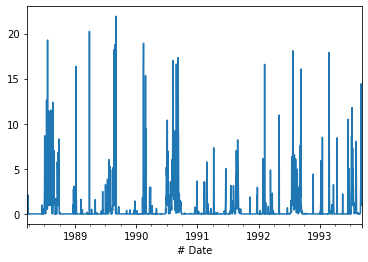

In [69]:
df['Rainfall'][3000:3000 + 2000].plot()

In [92]:
plot_comparison(start_idx=0, length=2163, train=False)

IndexError: ignored

<Figure size 1440x360 with 0 Axes>

In [0]:
model = Sequential()
model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))
model.add(GRU(units=512
              ,return_sequences = True))
model.add(Dense(256,activation = 'relu'))

In [0]:
if True:
    from tensorflow.python.keras.initializers import RandomUniform

    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)

    model.add(Dense(num_y_signals,
                    activation='linear',
                    kernel_initializer=init))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 512)         800256    
_________________________________________________________________
gru_1 (GRU)                  (None, None, 512)         1575936   
_________________________________________________________________
dense (Dense)                (None, None, 256)         131328    
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           257       
Total params: 2,507,777
Trainable params: 2,507,777
Non-trainable params: 0
_________________________________________________________________


In [0]:
warmup_steps = 15

In [0]:
model.compile(loss= loss_mse_warmup, optimizer=optimizer,metrics = [tf.keras.metrics.RootMeanSquaredError()])

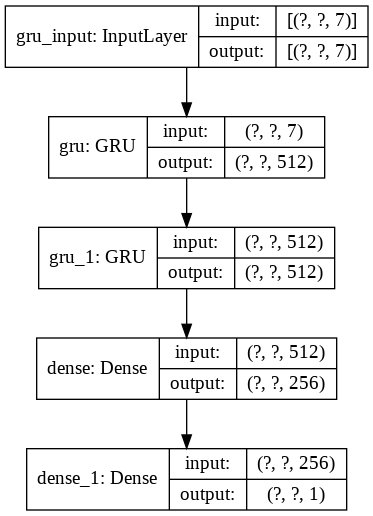

In [62]:
plot_model(model, show_shapes=True, to_file='stacked_gru.png')

In [64]:
%%time
model_history = model.fit(x=generator,
          epochs=40,
          steps_per_epoch=45,
          validation_data=validation_data,
          callbacks=callbacks)

Epoch 1/40
45/45 [==============================] - 7s 160ms/step - loss: 0.0093 - root_mean_squared_error: 0.0963 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0987 - lr: 1.0000e-04
Epoch 2/40
45/45 [==============================] - ETA: 0s - loss: 0.0090 - root_mean_squared_error: 0.0949
Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.0001.
45/45 [==============================] - 7s 162ms/step - loss: 0.0090 - root_mean_squared_error: 0.0949 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0985 - lr: 1.0000e-04
Epoch 3/40
45/45 [==============================] - 7s 163ms/step - loss: 0.0089 - root_mean_squared_error: 0.0945 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0986 - lr: 1.0000e-04
Epoch 4/40
45/45 [==============================] - 8s 167ms/step - loss: 0.0088 - root_mean_squared_error: 0.0940 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0984 - lr: 1.0000e-04
Epoch 5/40
45/45 [==============================] - 8s 169ms/step - loss: 0.0088 

In [65]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 1ms/step - loss: 0.0143 - root_mean_squared_error: 0.1192


In [66]:
# If you have several metrics you can use this instead.
if True:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

loss: 1.433e-02
root_mean_squared_error: 1.192e-01


In [0]:
x = np.expand_dims(x_test_scaled, axis=0)
predictions = model.predict(x)

In [68]:
# invert scaling for forecast

inv_yhat = y_scaler.inverse_transform(predictions[0])

# calculate RMSE
rmse = sqrt(mean_squared_error(y_test, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.658


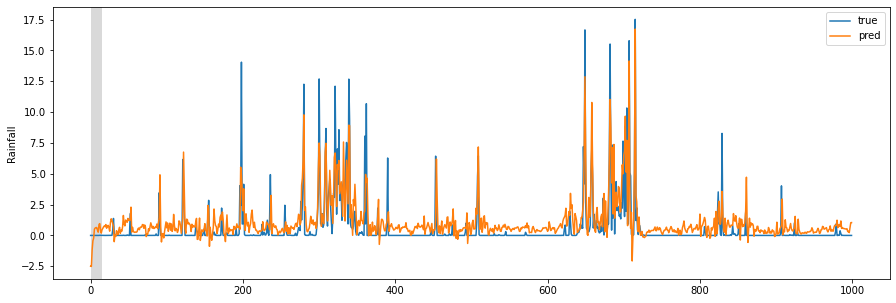

In [72]:
plot_comparison(start_idx= 1000, length=1000, train=True)

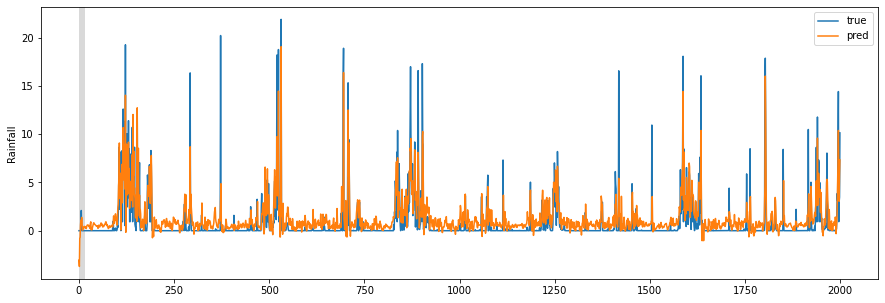

In [73]:
plot_comparison(start_idx=3000, length=2000, train=True)

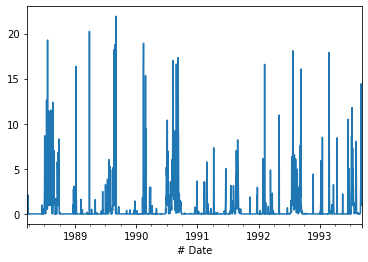

In [74]:
df['Rainfall'][3000:3000 + 2000].plot()

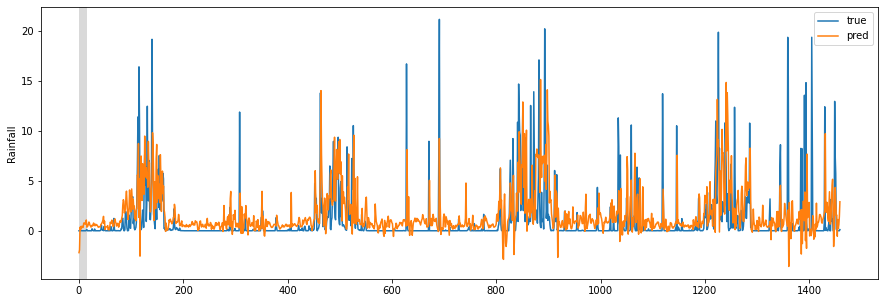

In [75]:
plot_comparison(start_idx=0, length=1460, train=False)

In [0]:
def plot_history(history):
  # plot loss
  pyplot.subplot(3, 1, 1)
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='valid')
  pyplot.title('loss', y=0, loc='center')
  pyplot.legend()
  # plot rmse
  pyplot.subplot(3, 1, 2)
  pyplot.plot(history.history['root_mean_squared_error'], label='train')
  pyplot.plot(history.history['val_root_mean_squared_error'], label='valid')
  pyplot.title('rmse', y=0, loc='center')
  pyplot.legend()
  # plot mape
  pyplot.subplot(3, 1, 3)
  pyplot.plot(history.history['mean_absolute_percentage_error'], label='train')
  pyplot.plot(history.history['val_mean_absolute_percentage_error'], label='valid')
  pyplot.title('mape', y=0, loc='center')
  pyplot.legend()
  pyplot.show()

In [80]:
model_history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error', 'lr'])

KeyError: ignored

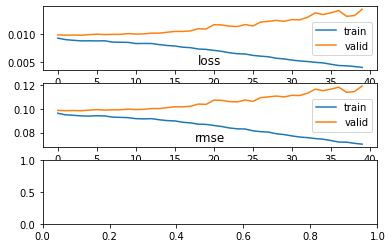

In [83]:
plot_history(model_history)

In [0]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

In [0]:
def create_time_steps(length):
  return list(range(-length, 0))

In [93]:
y_batch.shape

(256, 120, 1)

In [94]:
x_batch.shape

(256, 120, 7)

In [0]:
x_batch,y_batch = next(generator)

In [101]:
x_batch[:,1].shape

(256, 7)

In [103]:
x_batch[0][:,1].shape

(120,)

In [105]:
y_batch[0].shape

(120, 1)

ValueError: ignored

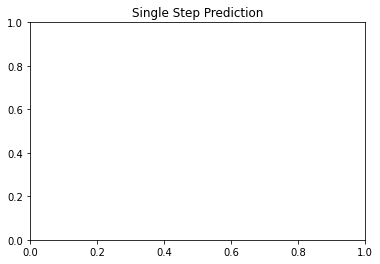

In [111]:
plot = show_plot([x_batch, y_batch,model.predict(x)[0]], 12,'Single Step Prediction')
plot.show()

STACKED LSTM

In [0]:
model = Sequential()
model.add(LSTM(units=512,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))
model.add(LSTM(units=512
              ,return_sequences = True))
model.add(Dense(256,activation = 'relu'))

In [0]:
if True:
    from tensorflow.python.keras.initializers import RandomUniform

    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)

    model.add(Dense(num_y_signals,
                    activation='linear',
                    kernel_initializer=init))

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 512)         1064960   
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 512)         2099200   
_________________________________________________________________
dense_2 (Dense)              (None, None, 256)         131328    
_________________________________________________________________
dense_3 (Dense)              (None, None, 1)           257       
Total params: 3,295,745
Trainable params: 3,295,745
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss= loss_mse_warmup, optimizer= 'adam',metrics = [tf.keras.metrics.RootMeanSquaredError()])

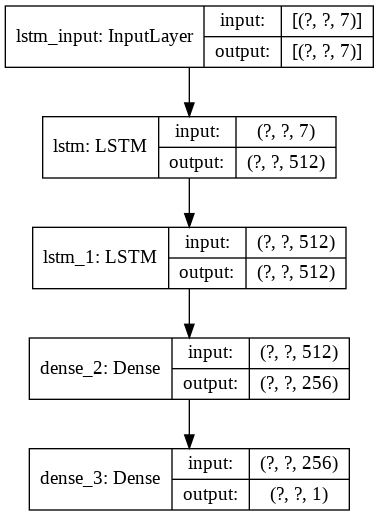

In [75]:
plot_model(model, show_shapes=True, to_file='stacked_lstm.png')

In [76]:
%%time
model_history = model.fit(x=generator,
          epochs=70,
          steps_per_epoch=45,
          validation_data=validation_data,
          callbacks=callbacks)

Epoch 1/70
45/45 [==============================] - 18s 401ms/step - loss: 0.0119 - root_mean_squared_error: 0.1096 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1042 - lr: 0.0010
Epoch 2/70
45/45 [==============================] - 17s 383ms/step - loss: 0.0104 - root_mean_squared_error: 0.1022 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1026 - lr: 0.0010
Epoch 3/70
45/45 [==============================] - 17s 385ms/step - loss: 0.0100 - root_mean_squared_error: 0.1008 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1003 - lr: 0.0010
Epoch 4/70
45/45 [==============================] - 17s 386ms/step - loss: 0.0098 - root_mean_squared_error: 0.0994 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0981 - lr: 0.0010
Epoch 5/70
45/45 [==============================] - 17s 387ms/step - loss: 0.0095 - root_mean_squared_error: 0.0978 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0971 - lr: 0.0010
Epoch 6/70
45/45 [==============================] - ETA: 0s - loss: 0.

In [77]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 2ms/step - loss: 0.0100 - root_mean_squared_error: 0.0999


In [78]:
# If you have several metrics you can use this instead.
if True:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

loss: 1.004e-02
root_mean_squared_error: 9.991e-02


In [0]:
x = np.expand_dims(x_test_scaled, axis=0)
predictions = model.predict(x)

In [80]:
# invert scaling for forecast

inv_yhat = y_scaler.inverse_transform(predictions[0])

# calculate RMSE
rmse = sqrt(mean_squared_error(y_test, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.228


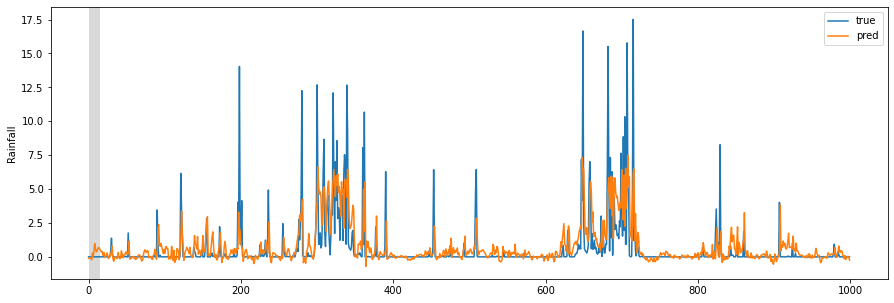

In [81]:
plot_comparison(start_idx= 1000, length=1000, train=True)

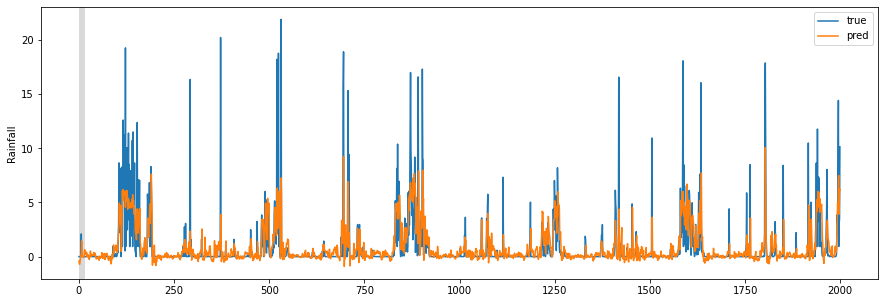

In [82]:
plot_comparison(start_idx=3000, length=2000, train=True)

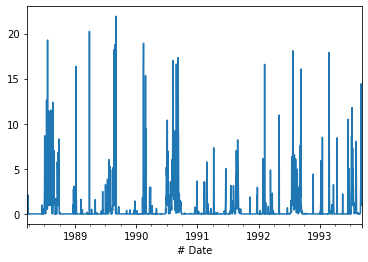

In [83]:
df['Rainfall'][3000:3000 + 2000].plot()

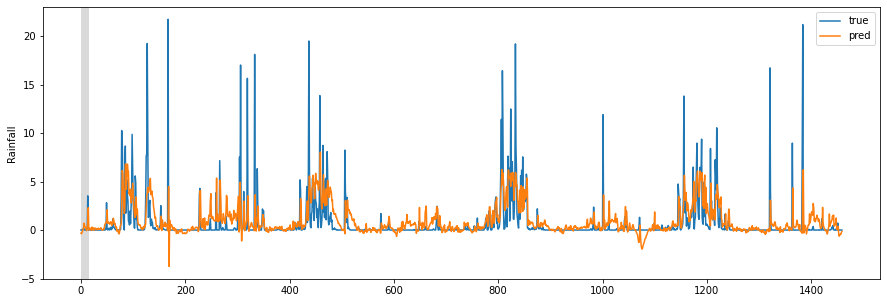

In [84]:
plot_comparison(start_idx=0, length=1460, train=False)

In [107]:
plot_model(model_history)

AttributeError: ignored

In [106]:
model_history.history['loss']

[0.011953253298997879,
 0.01099859643727541,
 0.01072419248521328,
 0.010495533235371113,
 0.010344298556447029,
 0.010158732533454895,
 0.010015623643994331,
 0.009876799769699574,
 0.0099848173558712,
 0.009716307744383812,
 0.009624063037335873,
 0.009299547411501408,
 0.009484129026532173,
 0.009248587302863598,
 0.009349014610052109,
 0.009262766689062119,
 0.009155984967947006,
 0.009231754578649998,
 0.009307822212576866,
 0.009205954149365425,
 0.008982393890619278,
 0.008890179917216301,
 0.008950900286436081,
 0.008859897032380104,
 0.008853246457874775,
 0.008658270351588726,
 0.008596538566052914,
 0.00851421244442463,
 0.008276558481156826,
 0.00818395335227251,
 0.008019276894629002,
 0.007992429658770561,
 0.007861640304327011,
 0.007632335647940636,
 0.007527824025601149,
 0.00733370054513216,
 0.00731641473248601,
 0.006991034839302301,
 0.006923913490027189,
 0.00691277114674449]